# OPTIMIZING HYPERPARAMETERS, MUENCHEN WEATHER STATION, ALL YEARS.

## Table of Contents

1. Import Libraries
2. Load Data
3. Data Wrangling
4. Reshape Data
5. Split Data
6. Optimize Data (Grid and Random search)
7. Build Random Forest Model
8. Feature Importance Analysis 

### 1. IMPORT LIBRARIES

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

### 2. LOAD DATA

In [2]:
# Define path for where data is stored
path = r'C:\Users\Administrator\Documents\data analytics\Machine Learning\ClimateWins\Data Sets'

In [3]:
# Read in the Answers data.
answers = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [4]:
# Read the unscaled data (which I want to use in this exercise).
data = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))

In [5]:
# Check the climate data (df data)
data.head(3)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9


In [6]:
# Check the shape of the data set
data.shape

(22950, 170)

In [7]:
answers.head(3)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# Check the answers shape
answers.shape

(22950, 16)

In [9]:
answers = answers.loc[data.index]

In [10]:
print(list(answers.columns))

['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather', 'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather', 'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather', 'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather', 'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather', 'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather', 'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather', 'VALENTIA_pleasant_weather']


In [11]:
print(list(data.columns))

['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_pr

### 3. DATA WRANGLING, clean and prepare data for deep learning. Remove unnecessary columns etc.

Since the result below showed that Munchen did not have the column for pressure, I inserted it on top before filtering the data, so that I receive this column in the data set. 

In [12]:
# Define columns that should input target value. 
source_col = "DUSSELDORF_pressure"
target_col = "MUNCHENB_pressure"

# Create the missing column and copy values from Duesseldorf
data[target_col] = data[source_col]

# Verify
print(data[[source_col, target_col]].head())

   DUSSELDORF_pressure  MUNCHENB_pressure
0               1.0161             1.0161
1               1.0161             1.0161
2               1.0161             1.0161
3               1.0161             1.0161
4               1.0161             1.0161


In [13]:
# Filter the climate data for only weather station Munchen.
# Keep only columns with Munchen in the naming

# Case-insensitive filter for columns containing "Munchen"
munchen_cols = data.columns[data.columns.str.contains("MUNCHENB_", case=False)]

# Select only these columns
data = data[munchen_cols]


In [14]:
data.head(3)

,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,MUNCHENB_pressure
0,5,0.67,0.20,0.1,0,0.0,6.9,1.1,10.4,1.0161
1,6,0.72,0.61,0.3,0,5.1,6.2,4.2,10.2,1.0161
2,6,0.91,0.20,0.3,0,0.0,5.8,4.0,8.0,1.0161


In [15]:
data.shape

(22950, 10)

In [16]:
# Filter the answers data for only predictions for Munchen
# Keep only columns with Munchen in the naming

# Case-insensitive filter for columns containing "MUNCHENB"
munchen_cols = answers.columns[answers.columns.str.contains("MUNCHENB_", case=False)]

# Select only these columns
answers = answers[munchen_cols]


In [17]:
answers.shape

(22950, 1)

In [18]:
# Check data shape
data.shape

(22950, 10)

In [19]:
# Check answers shape
answers.shape

(22950, 1)

In [20]:
# Define all observation types
observation_types = [
    'cloud_cover', 'wind_speed', 'humidity', 'pressure',
    'global_radiation', 'precipitation', 'snow_depth',
    'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [21]:
# Check shape
data.shape

(22950, 10)

In [22]:
# Detect missing columns
# Get current station names. No missing columns in Munchen.
stations = set([col.split('_')[0] for col in data.columns])

# Define expected observation types
observation_types = ['cloud_cover', 'humidity', 'pressure', 'global_radiation', 
                     'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']

# Build all expected column names
expected_columns = set()
for station in stations:
    for obs in observation_types:
        expected_columns.add(f'{station}_{obs}')

# Compare with actual columns
actual_columns = set(data.columns)

# Find which columns are missing
missing_columns = expected_columns - actual_columns
print("Missing columns:")
for col in sorted(missing_columns):
    print(col)

Missing columns:


In [23]:
# Confirm that no missing columns remain
print("Missing columns after filling:")
remaining_missing = expected_columns - set(data.columns)
print(remaining_missing)  # Should be an empty set

# Also check for NaN values
print("Top missing values by column:")
print(data.isnull().sum().sort_values(ascending=False).head(10))

Missing columns after filling:
set()
Top missing values by column:
MUNCHENB_cloud_cover         0
MUNCHENB_humidity            0
MUNCHENB_global_radiation    0
MUNCHENB_precipitation       0
MUNCHENB_snow_depth          0
MUNCHENB_sunshine            0
MUNCHENB_temp_mean           0
MUNCHENB_temp_min            0
MUNCHENB_temp_max            0
MUNCHENB_pressure            0
dtype: int64


In [24]:
# Check the data shape
data.shape

(22950, 10)

In [25]:
# Check the answers shape
answers.shape

(22950, 1)

In [26]:
print(list(answers.columns))

['MUNCHENB_pleasant_weather']


In [27]:
# Export cleaned dataset
data.to_csv(os.path.join(path, 'weather_munchen.csv'), index=False)

### 4. RESHAPE DATA in order to be able to use it as an input in the models. 

In [28]:
# Load cleaned data into X
x = pd.read_csv(os.path.join(path, 'weather_munchen.csv'), index_col=False)

# Load your labels
y = answers

In [29]:
# Check x
x.head(3)

,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,MUNCHENB_pressure
0,5,0.67,0.20,0.1,0,0.0,6.9,1.1,10.4,1.0161
1,6,0.72,0.61,0.3,0,5.1,6.2,4.2,10.2,1.0161
2,6,0.91,0.20,0.3,0,0.0,5.8,4.0,8.0,1.0161


In [30]:
# Confirm the current shapes
print("x shape (before reshaping):", x.shape)
print("y shape:", y.shape)

x shape (before reshaping): (22950, 10)
y shape: (22950, 1)


In [31]:
# Reshape data to 2D
print("Feature matrix shape (x):", x.shape)  # Should print (3652, 135)
print("Target variable shape (y):", y.shape)  # Should print (3652,)

Feature matrix shape (x): (22950, 10)
Target variable shape (y): (22950, 1)


In [32]:
# Confirm the final shape 
print("Final x shape:", x.shape)  # should be (22950, 15, 9)
print("Final y shape:", y.shape)  # should be (22950, 15)

Final x shape: (22950, 10)
Final y shape: (22950, 1)


In [33]:
# Confirm x
x

,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,MUNCHENB_pressure
0,5,0.67,0.20,0.10,0,0.0,6.9,1.1,10.4,1.0161
1,6,0.72,0.61,0.30,0,5.1,6.2,4.2,10.2,1.0161
2,6,0.91,0.20,0.30,0,0.0,5.8,4.0,8.0,1.0161
3,6,0.90,0.20,0.01,0,0.0,3.9,3.2,5.4,1.0161
4,5,0.85,0.65,0.96,0,5.6,1.8,-3.0,6.0,1.0161
...,...,...,...,...,...,...,...,...,...,...
22945,2,0.76,1.37,0.26,0,9.7,14.3,8.3,22.2,1.0214
22946,6,0.70,1.37,0.26,0,7.7,16.1,8.9,26.1,1.0186
22947,7,0.64,1.37,0.26,0,6.8,17.4,11.2,26.2,1.0196
22948,6,0.75,1.37,0.26,0,8.3,14.5,9.2,23.5,1.0176


### 5. SPLIT DATA

In [34]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [35]:
# Check shapes
print("Training set:", x_train.shape, y_train.shape)
print("Testing set:", x_test.shape, y_test.shape)

Training set: (17212, 10) (17212, 1)
Testing set: (5738, 10) (5738, 1)


In [36]:
# Check shapes
print("Training set:", x_train.shape, y_train.shape)
print("Testing set:", x_test.shape, y_test.shape)

Training set: (17212, 10) (17212, 1)
Testing set: (5738, 10) (5738, 1)


In [37]:
# 1️⃣ Convert data to float32 to save memory
# ------------------------------
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# ------------------------------
# 2️⃣ Initialize Random Forest with memory optimizations
# ------------------------------
clf = RandomForestClassifier(
    n_estimators=50,      # fewer trees → less memory
    max_depth=10,         # limit tree depth
    max_samples=1.0,      # train each tree on 50% of samples
    n_jobs=-1,            # use all CPU cores efficiently
    random_state=42
)

# ------------------------------
# 3️⃣ Train the model
# ------------------------------
clf.fit(x_train, y_train)

# ------------------------------
# 4️⃣ Make predictions
# ------------------------------
y_pred = clf.predict(x_test)

# ------------------------------
# 5️⃣ Evaluate accuracy
# ------------------------------
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy on Test Set:", round(accuracy * 100, 2), "%")


Random Forest Accuracy on Test Set: 100.0 %


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


### 6. HYPERPARAMETER OPTIMIZATION

Grid search

In [38]:
# creating a RF classifier
clf = RandomForestClassifier()

In [39]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [40]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(x_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\User

Search took 1.6814245104789733 minutes


In [41]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0


Random search

In [42]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [43]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [44]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(x_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Search took 2.3837398648262025 minutes


In [45]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 80, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 360}
Best RANDOM search score is: 1.0


In [46]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 80, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 360}
Best RANDOM search score is: 1.0


In [47]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 80, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 360}
Best RANDOM search score is: 1.0


In [48]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 410, max_depth=None, max_features=2, min_samples_leaf=1, min_samples_split=4, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(x_train, y_train)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_features=2, min_samples_split=4,
                       n_estimators=410)

In [49]:
# performing predictions on the test dataset
y_pred = clf3.predict(x_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


In [50]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 80, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 360}
Best RANDOM search score is: 1.0


### 7. BUILD RANDOM FOREST MODEL

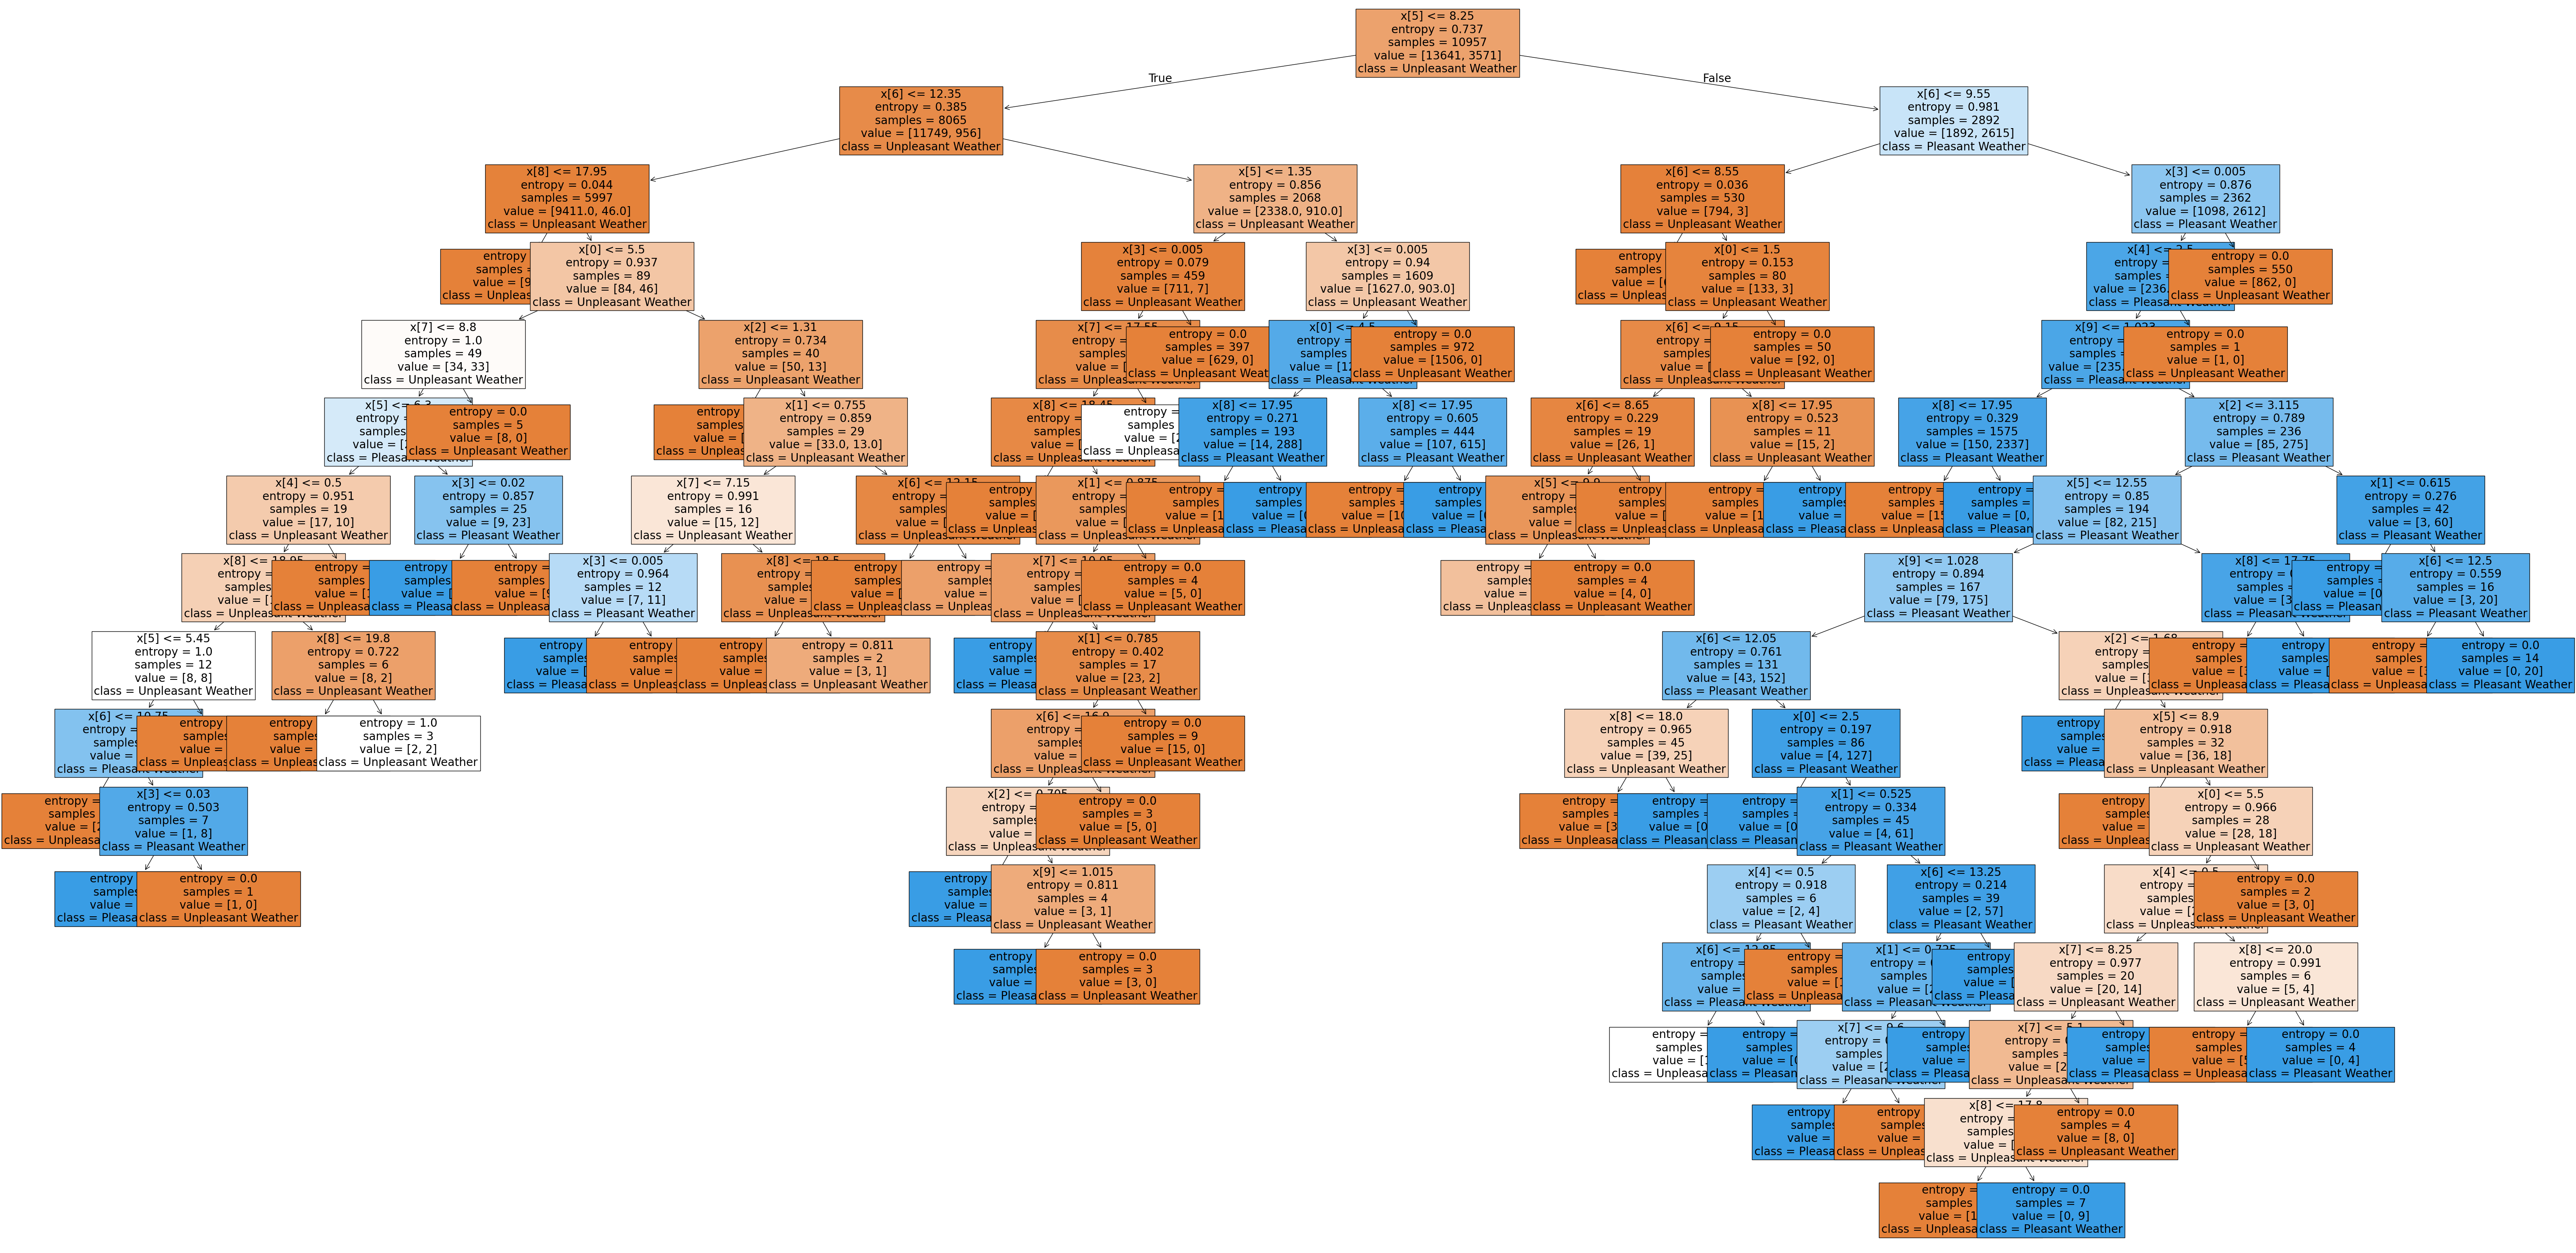

In [51]:
# Define class names for readability
class_names = ['Unpleasant Weather', 'Pleasant Weather']

# Plot the tree
fig = plt.figure(figsize=(80, 40))
plot_tree(clf3.estimators_[15], 
          filled=True, 
          fontsize=20,
          feature_names=None,  # You can add your feature names here if you'd like
          class_names=class_names);  # Adds class labels at the leaves

In [53]:
fig.savefig(os.path.join(path, 'optimized_random_forest_Munchen_all_years.png'),bbox_inches='tight')

7. FEATURE IMPORTANCE ANALYSIS

In [74]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(10,)


array([0.03899858, 0.02797182, 0.06205675, 0.32108774, 0.00392576,
       0.07952737, 0.13810486, 0.04548667, 0.27145604, 0.01138441])

In [80]:
print(x.columns)

Index(['MUNCHENB_cloud_cover', 'MUNCHENB_humidity',
       'MUNCHENB_global_radiation', 'MUNCHENB_precipitation',
       'MUNCHENB_snow_depth', 'MUNCHENB_sunshine', 'MUNCHENB_temp_mean',
       'MUNCHENB_temp_min', 'MUNCHENB_temp_max', 'MUNCHENB_pressure'],
      dtype='object')


### 8. FEATURE IMPORTANCE ANALYSIS

In [82]:
# Create a list of weather features

MUNCHEN_list = ['MUNCHENB_cloud_cover', 'MUNCHENB_humidity',
       'MUNCHENB_global_radiation', 'MUNCHENB_precipitation',
       'MUNCHENB_snow_depth', 'MUNCHENB_sunshine', 'MUNCHENB_temp_mean',
       'MUNCHENB_temp_min', 'MUNCHENB_temp_max', 'MUNCHENB_pressure']
wf_list = [feature.replace('MUNCHENB_', '') for feature in MUNCHEN_list]

print(wf_list)

['cloud_cover', 'humidity', 'global_radiation', 'precipitation', 'snow_depth', 'sunshine', 'temp_mean', 'temp_min', 'temp_max', 'pressure']


In [84]:
important = pd.Series(newarray, index = wf_list)
important

cloud_cover         0.038999
humidity            0.027972
global_radiation    0.062057
precipitation       0.321088
snow_depth          0.003926
sunshine            0.079527
temp_mean           0.138105
temp_min            0.045487
temp_max            0.271456
pressure            0.011384
dtype: float64

['cloud_cover', 'humidity', 'global_radiation', 'precipitation', 'snow_depth', 'sunshine', 'temp_mean', 'temp_min', 'temp_max', 'pressure']


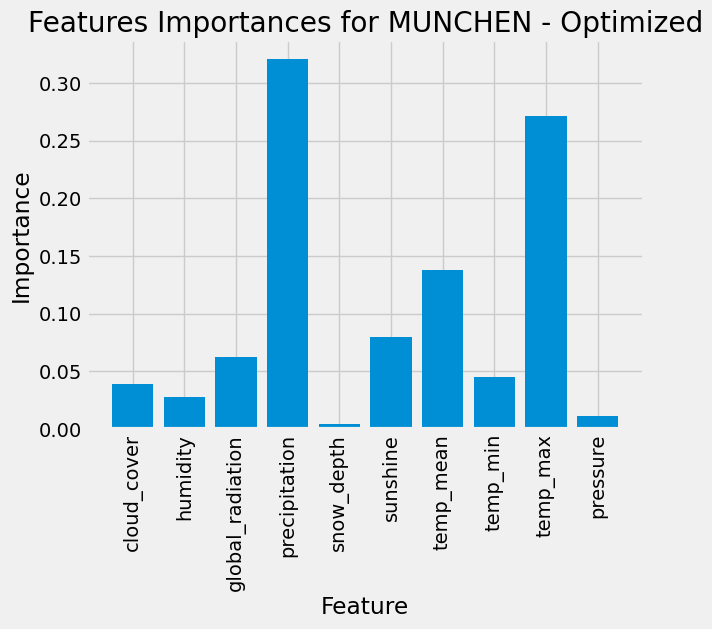

In [88]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wf_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wf_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for MUNCHEN - Optimized');

plt.savefig(os.path.join(path,'MUNCHEN_feature_importances_optimized.png'), bbox_inches='tight')
plt.show()

In [89]:
fig.savefig(os.path.join(path, 'feature_importance_Munchen_all_years.png'),bbox_inches='tight')